# data

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame({'group':['old title (A)','new title (B)'],'clicks':[22842,30640],'leads':[38,55]})

In [4]:
df['cr'] = df['leads']/df['clicks']

In [5]:
df

,group,clicks,leads,cr
0,old title (A),22842,38,0.001664
1,new title (B),30640,55,0.001795


У нового заголовка выше cr, но вдруг это просто случайность.  
Вдруг если бы у нас была возможность перезапустить этот тест результат был бы другой?

Если между заголовками нет никакой разницы, какова вероятность получить такие же и бОльшие различия в результатах?

Н0: нет разницы между двумя заголовками  
Н1: разница есть

# p-value bootstrap

In [6]:
# Избавляемся от групп
(55+38)/(22842+30640)

0.001738902808421525

In [7]:
# Создаем генератор для old title (A)
np.random.binomial(1,0.001738902808421525,size=22842).mean()

0.0024516242010331844

In [8]:
# Создаем генератор для new title (B)
np.random.binomial(1,0.001738902808421525,size=30640).mean()

0.0017297650130548303

In [13]:
# посчитаем разницу между новым и старым заголовком
# так как тест двусторонний(смотрим разницу в обе стороны) нужен модуль
abs(np.random.binomial(1,0.001738902808421525,size=30640).mean() - np.random.binomial(1,0.001738902808421525,size=22842).mean())

0.00014257895594734903

In [14]:
# разница между двумя заголовками в нашем эксперименте
abs(0.001795 - 0.001664)

0.00013100000000000004

In [19]:
# больше либо равна разница между новым экспериментом и нашим 
abs(np.random.binomial(1,0.001738902808421525,size=30640).mean() - np.random.binomial(1,0.001738902808421525,size=22842).mean()) >= abs(0.001795 - 0.001664)

True

In [23]:
# как часто будет происходить такая же или бОльшая разница в новых экспериментах чем в нашем эксперименте
[abs(np.random.binomial(1,0.001738902808421525,size=30640).mean() 
- np.random.binomial(1,0.001738902808421525,size=22842).mean()) >= abs(0.001795 - 0.001664) 
for _ in range(10)]

[True, True, True, True, False, False, True, True, True, True]

In [29]:
# p-value
np.mean([abs(np.random.binomial(1,0.001738902808421525,size=30640).mean() 
- np.random.binomial(1,0.001738902808421525,size=22842).mean()) >= abs(0.001795 - 0.001664) 
for _ in range(10000)])

0.718

p-value = 0.718  
No significant difference

# p-value evan miller chi-squared

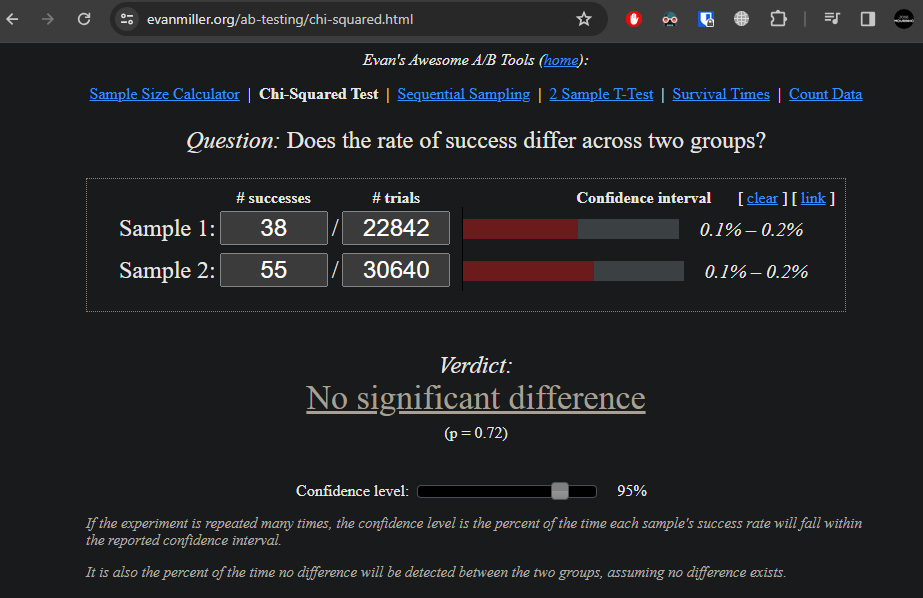

# p-value proportions_ztest

In [37]:
from statsmodels.stats.proportion import proportions_ztest
proportions_ztest([38,55],[22842,30640])

(-0.3608823375253004, 0.7181874077168726)